# Voice Recognition
This project shows simple voice recognition system based on MFCC (*Mel Frequency Cepstral Coefficient*) and DTW (*Dynamic Time Wrapping*). To use it, you need download following libraries:
* numpy,
* matplotlib,
* librosa,
* dtw.

*Szymon Wójs, 266761*

In [1]:
file1 = "266761_23_M_21_1"
file2 = "266761_23_M_21_2"

def read_signals(file1, file2) :
    with open(file1 + '.txt') as f:
        words1 = [l.replace('\n', '') for l in f.readlines()]
        labels = [l[l.replace('\t', '--', 1).find('\t'):] for l in words1]
        words1 = [l.split('\t') for l in words1]
    
    with open(file2 + '.txt') as f:
        words2 = [l.replace('\n', '') for l in f.readlines()]
        words2 = [l.split('\t') for l in words2]
        
    return words1, words2, labels

words1, words2, labels = read_signals(file1, file2)
print(labels)

['OTWORZ', 'ZAMKNIJ', 'GARAZ', 'ZROB', 'NASTROJ', 'WLACZ', 'WYLACZ', 'MUZYKE', 'SWIATLO', 'ZAPAL', 'PODNIES', 'ROLETY', 'TELEWIZOR']


### Calculate MFCCs

In [2]:
import  librosa
import  librosa.display
from dtw import dtw
import numpy as np
import matplotlib.pyplot as plt

mfccs1 = []
mfccs2 = []
words_number = 13

#  load an audio file as waveform as `y`, store the sampling rate as `sr` and compute MFCC
#  (Mel-frequency cepstral coefficients) features from the raw signal

def calculate_mfcc(file1, file2, length) :
    for i in range(length) :
        y1, sr1 = librosa.load(file1 + '.wav', 44100, True, float(words1[i][0]), float(words1[i][1]) - float(words1[i][0]))
        mfccs1.append(librosa.feature.mfcc(y1, sr1))
        y2, sr2 = librosa.load(file2 + '.wav', 44100, True, float(words2[i][0]), float(words2[i][1]) - float(words2[i][0]))
        mfccs2.append(librosa.feature.mfcc(y2, sr2))
        
    return mfccs1, mfccs2

mfccs1, mfccs2 = calculate_mfcc(file1, file2, words_number)

### Compare signals using DTW

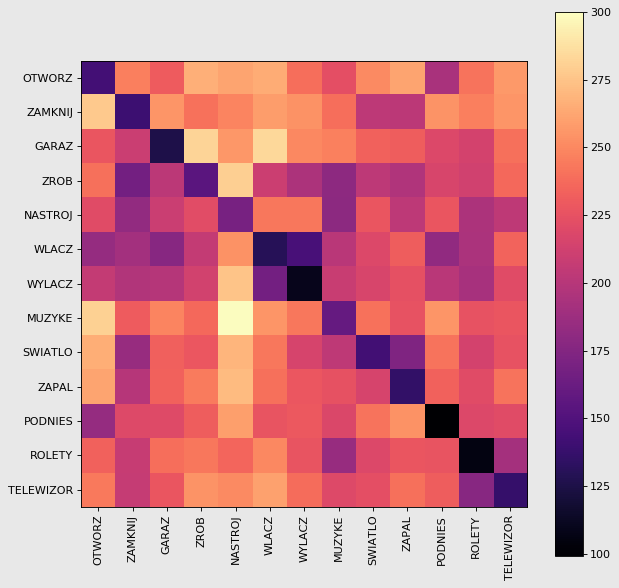

In [3]:
def matrix(mfccs1, mfccs2, labels, words_number):
    result_dist = np.ndarray(shape = (len(mfccs1), len(mfccs1)))
    for i in range(len(mfccs1)):
        for j in range(len(mfccs2)):
            dist, cost, acc_cost, path = dtw(mfccs1[i].T, mfccs2[j].T, dist=lambda x, y: np.linalg.norm(x - y, ord=1))
            result_dist[i][j] = dist

    plt.figure(figsize=(9,9), dpi= 80, facecolor='#E8E8E8', edgecolor='k')
    plt.imshow(result_dist, interpolation='none', cmap='magma')
    plt.tick_params(axis='both', bottom='on', top='off', labelbottom='on', labeltop='off')
    plt.xticks(range(len(result_dist)), labels, rotation='vertical')
    plt.yticks(range(len(result_dist)), labels)
    plt.colorbar()
    plt.show()
matrix(mfccs1, mfccs2, labels, words_number)

### Calculate classification accuracy for the same person

In [4]:
def estimate_accuracy(features1, features2):
    correct = 0
    for i in range(words_number) :
        dist, cost, acc_cost, path = dtw(features1[i].T, features2[0].T, dist=lambda x, y: np.linalg.norm(x - y, ord=1))
        minimum = dist;
        min_idx = 0;
        for j in range(1, words_number-1) :
            dist, cost, acc_cost, path = dtw(features1[i].T, features2[j].T, dist=lambda x, y: np.linalg.norm(x - y, ord=1))
            if minimum > dist :
                minimum = dist
                min_idx = j
        if(words1[i][2] == words1[min_idx][2]) :
            correct = correct + 1
        print(words1[i][2] + " ---> " + words2[min_idx][2])
        
    print("Classification accuracy: " + str((correct/words_number)*100) + "%")
    
estimate_accuracy(mfccs1, mfccs2)

OTWORZ ---> OTWORZ
ZAMKNIJ ---> ZAMKNIJ
GARAZ ---> GARAZ
ZROB ---> ZROB
NASTROJ ---> NASTROJ
WLACZ ---> WLACZ
WYLACZ ---> WYLACZ
MUZYKE ---> MUZYKE
SWIATLO ---> SWIATLO
ZAPAL ---> ZAPAL
PODNIES ---> PODNIES
ROLETY ---> ROLETY
TELEWIZOR ---> ROLETY
Classification accuracy: 92.3076923076923%


### Calculate classification accuracy for the signals from the different people

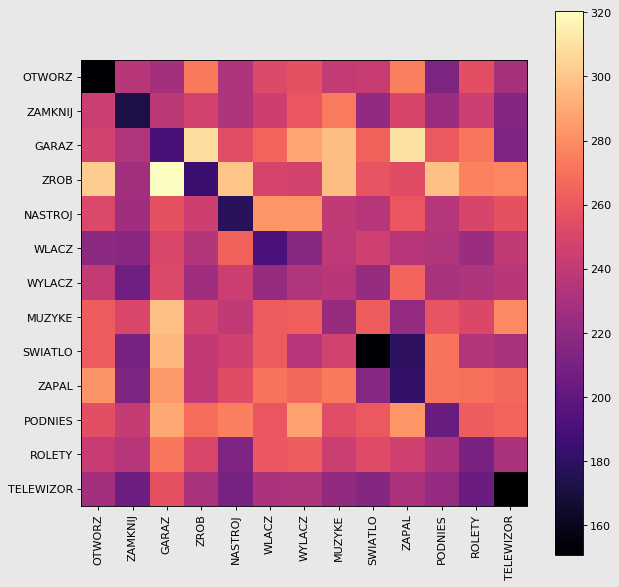

OTWORZ ---> OTWORZ
ZAMKNIJ ---> ZAMKNIJ
GARAZ ---> GARAZ
ZROB ---> ZROB
NASTROJ ---> NASTROJ
WLACZ ---> WLACZ
WYLACZ ---> ZAMKNIJ
MUZYKE ---> ZAPAL
SWIATLO ---> SWIATLO
ZAPAL ---> ZAPAL
PODNIES ---> PODNIES
ROLETY ---> ROLETY
TELEWIZOR ---> ROLETY
Classification accuracy: 76.92307692307693%


In [5]:
file1 = "266761_23_M_21_3"
file2 = "282075_23_M_21_1"
words1 = []
words2 = []
labels = []
mfccs1 = []
mfccs2 = []

words1, words2, labels = read_signals(file1, file2)
mfccs1, mfccs2 = calculate_mfcc(file1, file2, words_number)
matrix(mfccs1, mfccs2, labels, words_number)
estimate_accuracy(mfccs1, mfccs2)

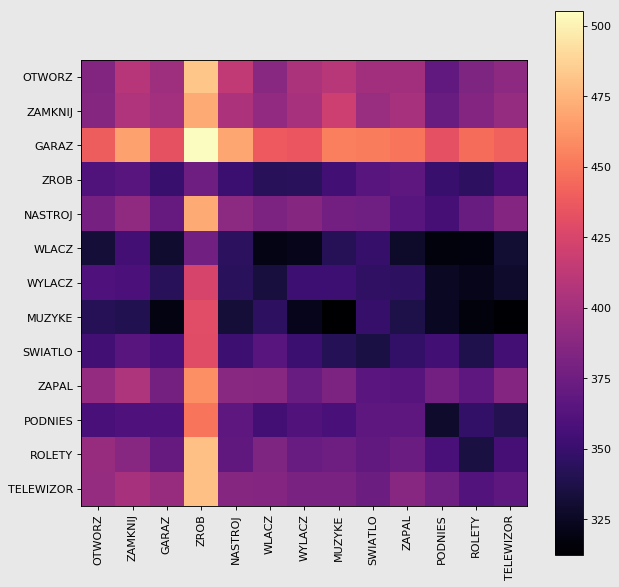

OTWORZ ---> PODNIES
ZAMKNIJ ---> PODNIES
GARAZ ---> PODNIES
ZROB ---> WLACZ
NASTROJ ---> PODNIES
WLACZ ---> PODNIES
WYLACZ ---> ROLETY
MUZYKE ---> MUZYKE
SWIATLO ---> SWIATLO
ZAPAL ---> ZAPAL
PODNIES ---> PODNIES
ROLETY ---> ROLETY
TELEWIZOR ---> ROLETY
Classification accuracy: 38.46153846153847%


In [6]:
file1 = "266761_23_M_21_3"
file2 = "266725_22_K_23_4"
words1 = []
words2 = []
labels = []
mfccs1 = []
mfccs2 = []

words1, words2, labels = read_signals(file1, file2)
mfccs1, mfccs2 = calculate_mfcc(file1, file2, words_number)
matrix(mfccs1, mfccs2, labels, words_number)
estimate_accuracy(mfccs1, mfccs2)